## Girvan Newman - (code)
(This is code I wrote without the packages that are commented out in the .py file for time sake)

In [5]:
import networkx as nx
import random
import time
import tracemalloc
#### Girvan Newman:
## 1. compute the edge betweeness
## 2. identify and remove the edge with max betweeness
## 3. recompute the edge betweeness
#NOTE: Due to my own version of the girvan newman being too slow, this code only utilizes the package
# networkx has for bwtweeness centrality. Therfore, some of my methods are commented out for timing sake.

In [15]:
class QBag():
    def __init__(self):
        self.n = []

    def add(self, item):
        self.n.append(item)

    
    def rm(self):
        return self.n.pop(0)
    
    def ifempty(self):
        return len(self.n) == 0
    
    def empty(self):
        while not self.ifempty():
            self.n.pop()
    
class PQBag():
    def __init__(self):
        self.cp = []
    def add(self, item, p):
        
        #check if item already exist - then change its priority
        for i in range(len(self.cp)):
            if self.cp[i][0] == item:
                if p < self.cp[i][1]:
                    self.cp[i] = (item, p)
                    self.heapProp(i+1)

        if (item, p) not in self.cp:

            self.cp.append((item, p))
            self.heapProp(len(self.cp))
        
    def take(self):
        temp = self.cp[0]
        self.cp[0] = self.cp[len(self.cp)-1]
        self.cp.pop(len(self.cp)-1) # pop out the last item
        
        self.heapProp(1)
        return temp

    def heapProp(self, sz):
        min = 0
        #should i change this to just look at the next node instead of parent -like a queue?
        
        #if statement to see whwere we are starting
        if sz == len(self.cp):
             #checking up - placing the added node in its right place
            while sz // 2 > 0:
            
                if self.cp[sz-1][1] < self.cp[(sz // 2)-1][1]: #index for parent 
                    temp = self.cp[(sz//2)-1]
                    self.cp[(sz//2) -1] = self.cp[(sz-1)]
                    self.cp[(sz-1)] = temp

                sz = sz //2
             
        else:
             #checking down - placing the nodes in its right place
            while (sz * 2) <= len(self.cp):
                min = self.min(sz)
                if self.cp[sz-1][1] > self.cp[min-1][1]:
                    temp =  self.cp[sz-1]
                    self.cp[sz-1] = self.cp[min-1]
                    self.cp[min-1] =  temp

                sz = min

                
    def min(self, sz):
        if ((sz*2) +1) > len(self.cp):
            return sz * 2 #return left child index
        else:
            if self.cp[(sz*2)-1][1] < self.cp[((sz*2) +1)-1][1]:
                return sz * 2
            else:
                return sz * 2 + 1
            

    def empty(self):
        return len(self.cp) == 0
    


    


In [17]:
def dijkstra(g, u,v, qb):
    qb.add(u, 0)
    
    visited = []
    preds = {}
    best_node = None
    
    # as long as there are still things in the bag:
    while not qb.empty():
        # take something out of the bag
        cur = qb.take()
        
        # if we've already visited this thing, pass
        if cur[0] in visited:
            continue
            
        # if we have found the node we're looking for, end the loop
        if cur[0] == v:
            
            break
            
        # if neigther of those two cases apply, get the neighbors
        neigh = list(g.neighbors(cur[0]))
        
        # add each neighbor to the bag
        for n in neigh:
            #add if statement for if it has block or body - don't add to bag
            
            p = abs(((u - n)**2)**.5)

            qb.add(n, p)
            if n not in visited:
                

                
                if n in preds:
                    tmp = preds[n]
                    
                    if tmp[1] > cur[1]:
                        preds[n] = cur
                    
                else:
                    preds[n] = cur
                
            if n != v:
                
                if not qb.empty():
                    if best_node is None:
                            best_node = (n, p)
                            
                    else:
                        if best_node[1] > p:

                            best_node = (n,p)
                            preds[best_node] = cur
            else:
                if best_node is None:
                    best_node = (u,0)

                preds[v] = best_node
        best_node = None
        # mark the current node as visited
        visited.append(cur[0])
        
        
    path = [cur[0]]
    p_eds = []
    
    while cur[0] != u:
        if cur[0] in preds:
            pre = preds[cur[0]]
            suc = cur[0]
            if g.has_edge(pre[0],suc):
                
                p_eds.append((pre[0],suc))
            cur = preds[cur[0]]
            
            path.append(cur[0])
    path.reverse()
    
    return p_eds


def CFS(g, u,qb):

    qb.add(u)
    visited = []
    preds = {}
    found = False

    while not qb.ifempty():

        cur = qb.rm()

        if cur not in visited:
           
            neighbors  = list(g.neighbors(cur))


            for n in neighbors:
                qb.add(n)
                if n not in visited:
                    preds[n] = cur


            visited.append(cur)


    path = [cur]
    
    while cur!= u:
        
        
        cur = preds[cur]
        path.append(cur)

    path.reverse()
    
    return path



In [ ]:
def shortestPath(gr):
    #wait till class time to start this part
    #breadth first search BFS
    #return a dic/tuple of node with shortes path???
    b = PQBag()
    paths = []
    ls = list(gr.nodes)
    
    
    for n in ls:

        for nt in ls:
            
            paths.append(dijkstra(gr, n, nt, b))
            

    return paths

In [ ]:
def calculateB(shrtLst, g):
    # each node should have been assign a betweeness centrality score - should that be
    
    egs = list(g.edges)

    bwt_cen = {}

    #betweeness centrality = the number of paths that pass through v // total # of shortest from node a to node b
    #create a dict of each node and its betweeness
    for e in egs:
        bwt = 0
     
        occur = 0
        
        #loop through each node and calculate
        for sht in shrtLst:
            
            if e in sht:
                
                occur = occur +  1
        
        bwt = occur / len(shrtLst)
        
        
        bwt_cen[e] = bwt   

    
     
    return bwt_cen

In [7]:
#### removeEdge ####
# this method partitions th graph by removing the edge with the highest centrality each time
# it is called
# bw_edge: a dictionary of edges(key) and their betweeness centrality (value)
# gr: the networkx graph
# returns: gr
def removeEdge(bw_edge, gr):
    #edges with the most betweenes are removed - but one at a time and then recalculate between
   
    bw_max = 0
    edgeIdx = -1
    
    
    for bw in bw_edge:
        

        if bw_edge[bw] > bw_max:
            bw_max = bw_edge[bw]
            edgeIdx = bw
    
    #remove the edge with highest betweeness centrality
    
        
    edg = [k for k,v in bw_edge.items() if v == bw_edge[edgeIdx]]
    if len(edg) != 0:
        gr.remove_edge(edg[0][0], edg[0][1]) #we only want the first edge that has this high score


    return gr #return the partitoned graph back
    





In [8]:
def showCommunity1(graph):
    #show the communites it has split into
    #use the find neighbors - right?
    
    communities = {} 
    #USE a DFS and whatever node was never visited at the end of this will probably be its own community
    #the path will be the community we use
    b = QBag()
    l = list(graph.nodes)
    
    #need_vis = []
    com_idx = 1
    while len(l) != 0:
        cm = []
        
        p = CFS(graph, l[0],b)
        
        for n in l:
            if n in p:
                
                cm.append(n)
                
                l.remove(n)
                
        communities[com_idx] = cm
                
        
        com_idx = com_idx +1

            
    return communities



In [9]:
def showCommunity2(graph):
    #show the communites/components it has split into
    #
    coms = nx.connected_components(graph)
    communities = {}
    i =1
    for com in coms:
        
        communities[i] = com
        i = i +1 
    
    return communities

## Testing for Girvan Newman Alg.

Testing the algorithm with betweeness cen. package and with showCommunity2 method (using connected components)

In [2]:
#### GirvanNewman Method: ####
# this is where all the code gets ran
# gh: the networkx graph
# k: the number of components desired??

# com: a dictionary of communities(key) and their respective nodes (value)
# tTotal:  the total amount of time to run the code in seconds (float)
# mem: the amount of memory used to run the code
# return: com, tTotal, mem
def GirvanNewman(gh, k):
    #where we run the whole thing!
    same = False
    st = time.time()
    tracemalloc.start()
    cs = {}
    
    
    #p = shortestPath(gh)
    

    #bt = calculateB(p, gh)
    

    
    bt = nx.edge_betweenness_centrality(gh)
    gh = removeEdge(bt, gh)

    
    #nx.is_connected(h)
    #k = ((len(gh.nodes))//(2/3) ) + 4
    #k = (len(gh.nodes)) * 1.5
    cps = nx.number_connected_components(gh)

    #md = 0
    while k > cps:
       
        
        #p = shortestPath(gh)
        

        #bt = calculateB(p, gh)
        

        bt = nx.edge_betweenness_centrality(gh) 

        gh = removeEdge(bt, gh)
        
       
        cps = nx.number_connected_components(gh)
        
       
        #md = nx.community.modularity(gh, nx.connected_components(gh))
       

    #what to return:
    et =  time.time()
    tTotal = et - st
    com = showCommunity2(gh)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    memory_used_kb = peak / 1024
    return [com, tTotal, memory_used_kb], gh
        

In [3]:
import datetime
#### GirvanNewman Method: ####
# this is where all the code gets ran but with a TIME LIMIT
# gh: the networkx graph
# tm: time limit to run the algorithm ***
# com: a dictionary of communities(key) and their respective nodes (value)
# tTotal:  the total amount of time to run the code in seconds (float)
# mem: the amount of memory used to run the code
# return: com, tTotal, mem
def GirvanNewman_T(gh,tm):
    #where we run the whole thing!
    
    st = time.time()
    tracemalloc.start()
    
    
    
    bt = nx.edge_betweenness_centrality(gh)
    gh = removeEdge(bt, gh)

    
    
    cur_time = time.time() - st
    while cur_time < tm:
        
        bt = nx.edge_betweenness_centrality(gh) 

        gh = removeEdge(bt, gh)
        

        cur_time = time.time() - st
    #what to return:
    et =  time.time()
    tTotal = et - st
    com = showCommunity2(gh)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    memory_used_kb = peak / 1024
    return [com, tTotal, memory_used_kb]

In [12]:
##testing purposes - just calls the method multiple times with different graphs
#testing the different method, one with desired number of components and the other a time limit
    
nds = list(range(10, 20))
#nds = random.shuffle(nds)

print("For regular algorithm:...")
for i in range(len(nds)):
    
    t = nx.erdos_renyi_graph(nds[i], 0.5)
    
    (f, ti, m), g = GirvanNewman(t, 5)  # 2nd value is the number of components wanted
    
    print(f, "time: ", ti, " memory: ", m)
print("For time limit:...")
for i in range(len(nds)):
    t = nx.erdos_renyi_graph(nds[i], 0.5)
    
    f, ti, m = GirvanNewman_T(t, 0.5)  # 2nd value is the time to run
    print(f, "time: ", ti, " memory: ", m)



For regular algorithm:...
{1: {0, 1}, 2: {2}, 3: {3}, 4: {4}, 5: {5, 6, 7, 8, 9}} time:  0.0049512386322021484  memory:  13.15625
{1: {0}, 2: {1}, 3: {2, 3, 4, 7, 8, 9, 10}, 4: {5}, 5: {6}} time:  0.008448123931884766  memory:  10.96875
{1: {0}, 2: {1, 4, 5, 6, 8, 9, 10, 11}, 3: {2}, 4: {3}, 5: {7}} time:  0.01233053207397461  memory:  156.63671875
{1: {0, 2, 4, 5, 7, 8, 10, 11, 12}, 2: {1}, 3: {3}, 4: {6}, 5: {9}} time:  0.00987553596496582  memory:  11.1640625
{1: {0, 9, 12, 7}, 2: {8, 1, 5}, 3: {2}, 4: {3, 4, 10, 11, 13}, 5: {6}} time:  0.020902395248413086  memory:  11.5703125
{1: {0, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14}, 2: {1}, 3: {8}, 4: {9}, 5: {11}} time:  0.01994633674621582  memory:  12.3671875
{1: {0, 13, 5, 6}, 2: {1, 3, 4, 7, 9, 10, 12, 15}, 3: {2}, 4: {8}, 5: {11, 14}} time:  0.025561094284057617  memory:  11.953125
{1: {0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 14, 15, 16}, 2: {5}, 3: {9}, 4: {12}, 5: {13}} time:  0.039580345153808594  memory:  18.1796875
{1: {0, 1, 2, 3, 4, 5, 7, 8

Testing the algorithm with betweeness cen. package and with showCommunity1 method (a bit slower using BFS)

In [13]:
#### GirvanNewman Method: ####
# this is where all the code gets ran
# gh: the networkx graph
# k: the number of components desired??

# com: a dictionary of communities(key) and their respective nodes (value)
# tTotal:  the total amount of time to run the code in seconds (float)
# mem: the amount of memory used to run the code
# return: com, tTotal, mem
def GirvanNewman2(gh, k):
    #where we run the whole thing!
    same = False
    st = time.time()
    tracemalloc.start()
    cs = {}
    
    
    #p = shortestPath(gh)
    

    #bt = calculateB(p, gh)
    

    
    bt = nx.edge_betweenness_centrality(gh)
    gh = removeEdge(bt, gh)

    
    #nx.is_connected(h)
    #k = ((len(gh.nodes))//(2/3) ) + 4
    #k = (len(gh.nodes)) * 1.5
    cps = nx.number_connected_components(gh)

    #md = 0
    while k > cps:
       
        
        #p = shortestPath(gh)
        

        #bt = calculateB(p, gh)
        

        bt = nx.edge_betweenness_centrality(gh) 

        gh = removeEdge(bt, gh)
        
       
        cps = nx.number_connected_components(gh)
        
       
        #md = nx.community.modularity(gh, nx.connected_components(gh))
       

    #what to return:
    et =  time.time()
    tTotal = et - st
    com = showCommunity1(gh)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    memory_used_kb = peak / 1024
    return [com, tTotal, memory_used_kb], gh
        

In [18]:
##testing purposes - just calls the method multiple times with different graphs
    
nds = list(range(10, 30))
#nds = random.shuffle(nds)
graphs2 = []
times2 = []
memories2 = []

graphs = []
times = []
memories = []
org = []
sizes = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
for i in range(len(nds)):
    
    t = nx.erdos_renyi_graph(nds[i], 0.5)
    org.append(t)
    
    (f, ti, m), g = GirvanNewman(t, 5)  # uses the connect components community method
    graphs.append(g)
    times.append(ti)
    memories.append(m)
    
    print(f, "time: ", ti, " memory: ", m)
    print("---------------")
    (f2, ti2, m2), g2 = GirvanNewman2(t,5) # uses the BFS community method
    graphs2.append(g2)
    times2.append(ti2)
    memories2.append(m2)
    print(f2, "time: ", ti2, " memory: ", m2)

    print("next graph...")


{1: {0}, 2: {8, 1, 5}, 3: {2, 3, 4, 6}, 4: {7}, 5: {9}} time:  0.006496906280517578  memory:  934.9716796875
---------------
{1: [0], 2: [1, 8], 3: [2, 4], 4: [3], 5: [5], 6: [6], 7: [7], 8: [9]} time:  0.0002918243408203125  memory:  4.1328125
next graph...
{1: {0}, 2: {1, 2, 3, 4, 6, 8, 10}, 3: {5}, 4: {7}, 5: {9}} time:  0.006392955780029297  memory:  9.0234375
---------------
{1: [0], 2: [1, 4, 6, 8], 3: [2, 10], 4: [3], 5: [5], 6: [7], 7: [9]} time:  0.0004012584686279297  memory:  5.9765625
next graph...
{1: {0, 1, 4, 5, 7, 8, 10, 11}, 2: {2}, 3: {3}, 4: {6}, 5: {9}} time:  0.012667179107666016  memory:  153.5166015625
---------------
{1: [0, 10], 2: [1, 4, 7, 11], 3: [2], 4: [3], 5: [5], 6: [6], 7: [8], 8: [9]} time:  0.0004222393035888672  memory:  6.078125
next graph...
{1: {0, 2, 3, 4, 7, 9, 10, 11, 12}, 2: {1}, 3: {5}, 4: {6}, 5: {8}} time:  0.015086650848388672  memory:  11.71875
---------------
{1: [0, 4, 9, 11], 2: [1], 3: [2, 7, 12], 4: [3], 5: [5], 6: [6], 7: [8], 8: [1

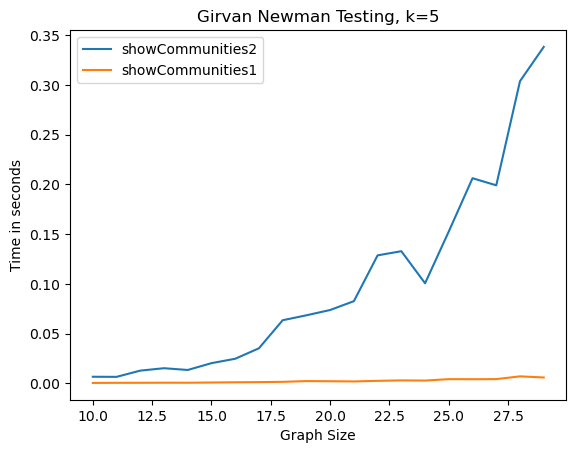

In [19]:
import matplotlib.pyplot as plt

plt.plot(sizes, times, label='showCommunities2')
plt.plot(sizes, times2, label='showCommunities1')
plt.xlabel('Graph Size')
plt.ylabel('Time in seconds')
plt.title('Girvan Newman Testing, k=5')
plt.legend()
plt.show()

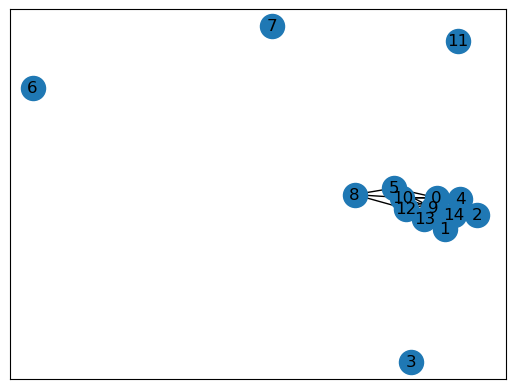

In [20]:
#To plot what the graphs look like actually
# take one of the graphs from the for loop

import networkx as nx
import networkx as nt
g1 = graphs[5]
g2 = org[5]
nx.draw_networkx(g1)
#the alterated graph from first algorithm

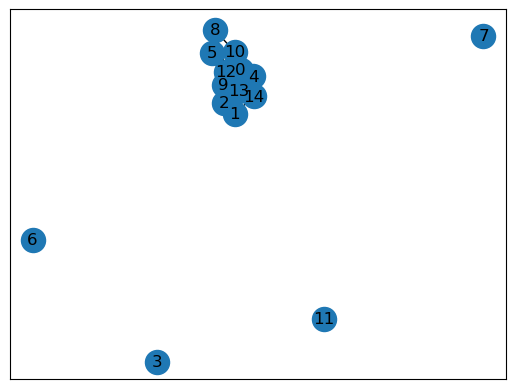

In [21]:
nt.draw_networkx(g2)
#the orginal graph

## Tesing the iterations

In [22]:
#### GirvanNewman Method: k = number of edges####
# this is where all the code gets ran
# gh: the networkx graph
# k: the number of components desired??

# com: a dictionary of communities(key) and their respective nodes (value)
# tTotal:  the total amount of time to run the code in seconds (float)
# mem: the amount of memory used to run the code
# return: com, tTotal, mem
def GirvanNewman3(gh, k):
    #where we run the whole thing!
    same = False
    st = time.time()
    tracemalloc.start()
    cs = {}
    
    
    #p = shortestPath(gh)
    

    #bt = calculateB(p, gh)
    

    
    bt = nx.edge_betweenness_centrality(gh)
    gh = removeEdge(bt, gh)

    
    #nx.is_connected(h)
    #k = ((len(gh.nodes))//(2/3) ) + 4
    #k = (len(gh.nodes)) * 1.5
    cps = nx.number_connected_components(gh)

    #md = 0
    while k > 0:
       
        
        #p = shortestPath(gh)
        

        #bt = calculateB(p, gh)
        

        bt = nx.edge_betweenness_centrality(gh) 

        gh = removeEdge(bt, gh)
        
       
        cps = nx.number_connected_components(gh)
        
       
        k = k -1
       

    #what to return:
    et =  time.time()
    tTotal = et - st
    com = showCommunity1(gh)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    memory_used_kb = peak / 1024
    return [com, tTotal, memory_used_kb], gh
        

In [23]:
 # testing   
nds = list(range(10, 20))
#nds = random.shuffle(nds)
graphs2 = []
times2 = []
memories2 = []

graphs = []
times = []
memories = []
org = []
sizes = [10,11,12,13,14,15,16,17,18,19]
for i in range(len(nds)):
    
    t = nx.erdos_renyi_graph(nds[i], 0.5)
    org.append(t)
    
    (f, ti, m), g = GirvanNewman(t, 5)  # uses the connect components community method
    graphs.append(g)
    times.append(ti)
    memories.append(m)
    
    print(f, "time: ", ti, " memory: ", m)
    print("---------------")
    (f2, ti2, m2), g2 = GirvanNewman3(t, nds[i]) # uses the BFS community method
    graphs2.append(g2)
    times2.append(ti2)
    memories2.append(m2)
    print(f2, "time: ", ti2, " memory: ", m2)

    print("next graph...")


{1: {0, 2, 3, 5}, 2: {1, 4, 9}, 3: {6}, 4: {7}, 5: {8}} time:  0.003803253173828125  memory:  13.6328125
---------------
{1: [0], 2: [1], 3: [2], 4: [3], 5: [4], 6: [5], 7: [6], 8: [7], 9: [8], 10: [9]} time:  0.002335786819458008  memory:  4.796875
next graph...
{1: {0}, 2: {1, 2, 5, 6, 7, 8, 10}, 3: {3}, 4: {4}, 5: {9}} time:  0.01020503044128418  memory:  153.255859375
---------------
{1: [0], 2: [1], 3: [2, 10], 4: [3], 5: [4], 6: [5], 7: [6], 8: [7], 9: [8], 10: [9]} time:  0.0038564205169677734  memory:  7.3671875
next graph...
{1: {0}, 2: {1, 2, 3, 5, 6, 7, 10, 11}, 3: {4}, 4: {8}, 5: {9}} time:  0.008334159851074219  memory:  11.140625
---------------
{1: [0], 2: [1, 6, 10], 3: [2], 4: [3], 5: [4], 6: [5], 7: [7], 8: [8], 9: [9], 10: [11]} time:  0.0041882991790771484  memory:  7.40625
next graph...
{1: {0}, 2: {8, 1, 4, 6}, 3: {2, 7, 9, 10, 11, 12}, 4: {3}, 5: {5}} time:  0.01562643051147461  memory:  11.5390625
---------------
{1: [0], 2: [1], 3: [2], 4: [3], 5: [4], 6: [5], 

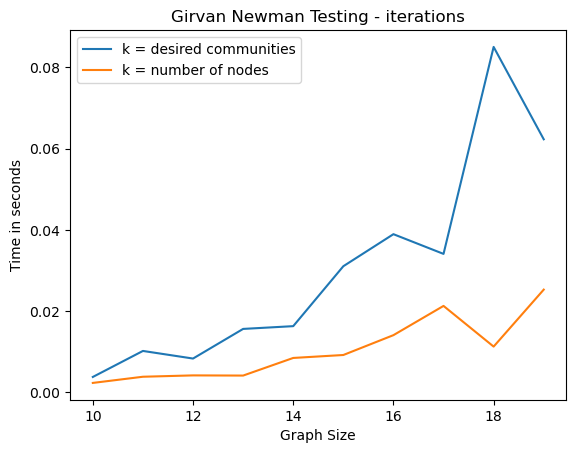

In [24]:
import matplotlib.pyplot as plt

plt.plot(sizes, times, label='k = desired communities')
plt.plot(sizes, times2, label='k = number of nodes')
plt.xlabel('Graph Size')
plt.ylabel('Time in seconds')
plt.title('Girvan Newman Testing - iterations')
plt.legend()
plt.show()

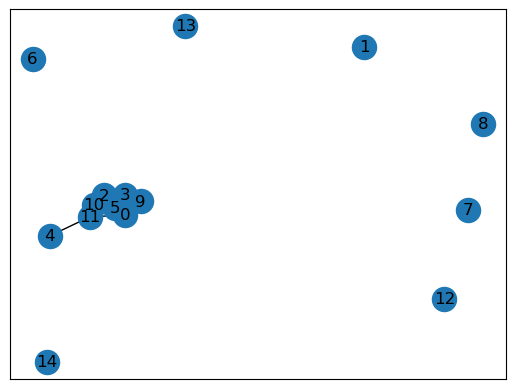

In [25]:
#To plot what the graphs look like actually
# take one of the graphs from the for loop

import networkx as nx
import networkx as nt
g1 = graphs[5]
g2 = graphs2[5]
nx.draw_networkx(g1)

#the alterated graph from first algorithm

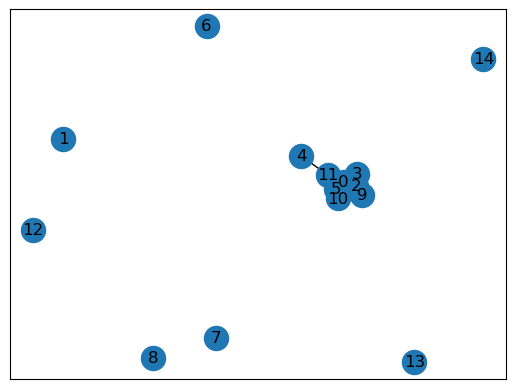

In [26]:
nt.draw_networkx(g2)
#graph for k = number of nodes